In [44]:
import pandas as pd
import numpy as np
from utils import adstock, s_curve, create_transformed_tables, plot_stacked_area_with_actual, plot_transformed_vs_raw, plot_data_set
import pandas as pd

### Create a DataFrame with 3 Years of Weekly Data

This cell generates a DataFrame with 156 weeks (3 years), where the first column is a cyclical variable based on a sine wave that repeats each year.


In [45]:
import pandas as pd
import numpy as np

# Number of years and weeks per year
years = 3
weeks_per_year = 52
n_weeks = years * weeks_per_year

# Generate week numbers
week = np.arange(n_weeks)

# Sine wave: one cycle per year
sine_wave = np.sin(2 * np.pi * (week % weeks_per_year) / weeks_per_year)

# Create date range starting from 1/1/22, weekly frequency
start_date = '2022-01-01'
dates = pd.date_range(start=start_date, periods=n_weeks, freq='W-SAT')

# Price pattern: repeat [5, 6, 5.5, 4] to fill n_weeks
price_pattern = [5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5.5,5.5,4,4,4,4,4,4,4,4,4,4,4,4]
price = np.resize(price_pattern, n_weeks)

distribution = np.full(n_weeks, 0.5)
distribution[n_weeks//2:] = 0.6

# Set max value for media variables
max_grp = 100

# Media variables: each is random 0-max_grp for a 3-month block, rest 0
media1 = np.zeros(n_weeks)
media2 = np.zeros(n_weeks)
media3 = np.zeros(n_weeks)

block_len = 13  # ~3 months (weeks)
media1[:block_len] = np.random.uniform(0, max_grp, block_len)
media2[block_len:2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[2*block_len:3*block_len] = np.random.uniform(0, max_grp, block_len)

block_len = 8  # 2 months (weeks)
start_period = 52
media1[start_period:block_len+start_period] = np.random.uniform(0, max_grp, block_len)
media2[start_period+block_len:start_period+2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[start_period+2*block_len:start_period+3*block_len] = np.random.uniform(0, max_grp, block_len)

start_period = 104
media1[start_period:block_len+start_period] = np.random.uniform(0, max_grp, block_len)
media2[start_period+block_len:start_period+2*block_len] = np.random.uniform(0, max_grp, block_len)
media3[start_period+2*block_len:start_period+3*block_len] = np.random.uniform(0, max_grp, block_len)

df_data = pd.DataFrame({
    'c':1,
    'cyclical_var': sine_wave,
    'price': price,
    'distribution': distribution,
    'media1': media1,
    'media2': media2,
    'media3': media3,
    'error':np.random.normal(0, 1, n_weeks)
}, index=dates)

df_data.head()

,c,cyclical_var,price,distribution,media1,media2,media3,error
2022-01-01,1,0.000000,5.0,0.5,54.082715,0.0,0.0,-0.311228
2022-01-08,1,0.120537,5.0,0.5,57.340664,0.0,0.0,0.186313
2022-01-15,1,0.239316,5.0,0.5,72.351845,0.0,0.0,-1.041604
2022-01-22,1,0.354605,5.0,0.5,59.713326,0.0,0.0,1.008651
2022-01-29,1,0.464723,5.0,0.5,9.490495,0.0,0.0,-0.318086


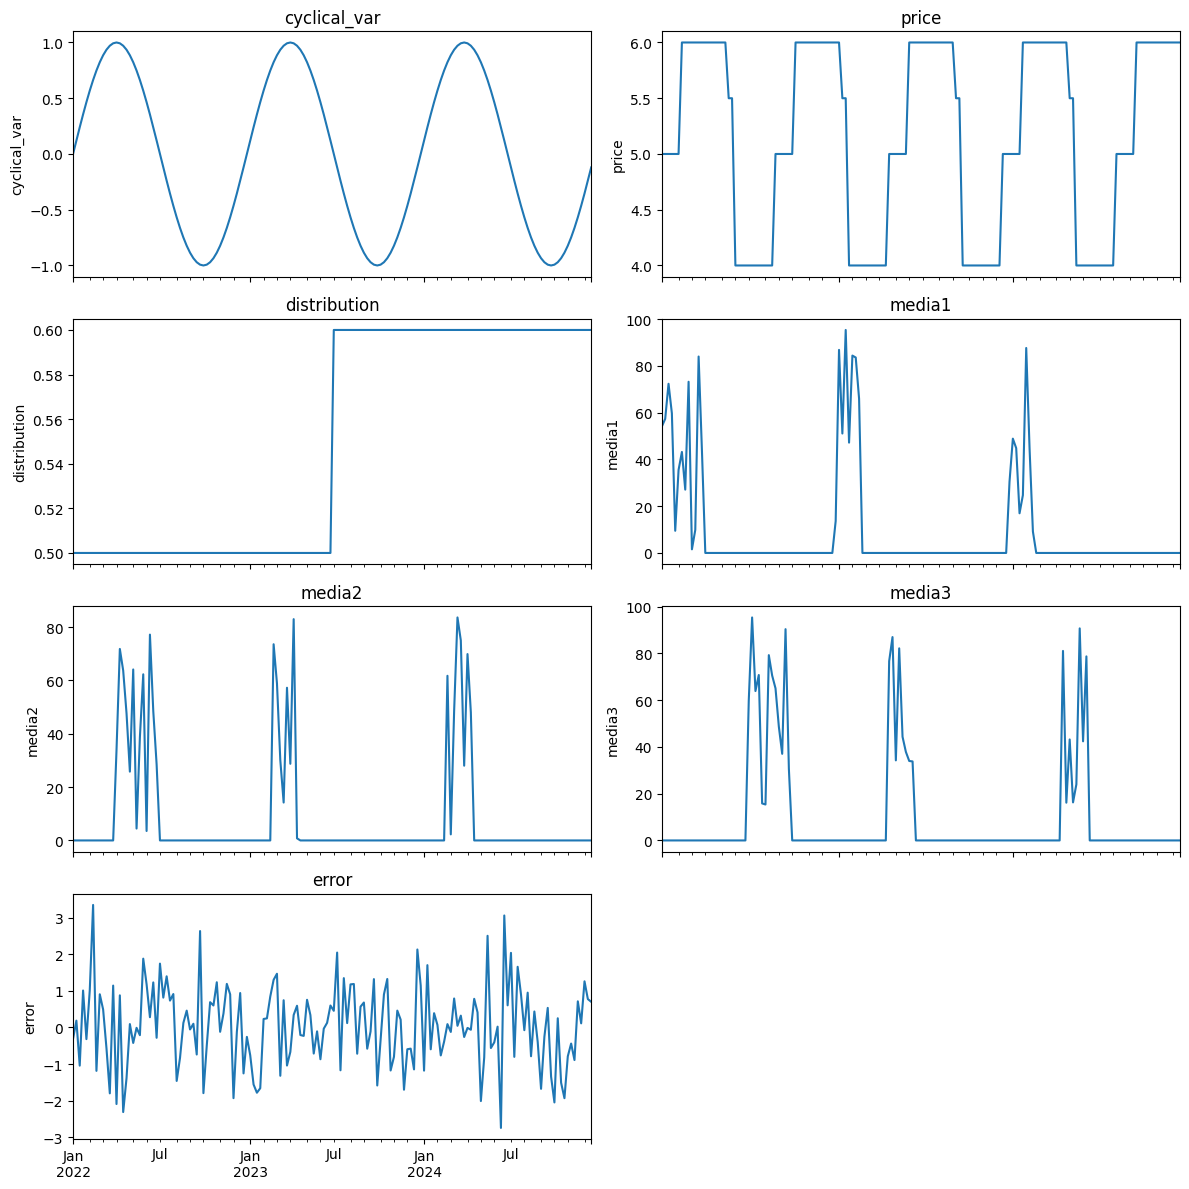

In [46]:
plot_data_set(df_data)

In [ ]:
import os
# Ensure Data folder exists
os.makedirs('Data', exist_ok=True)

# Save dataframes as CSV
if 'df_data' in globals():
    df_data.to_csv('Data/df_data.csv')
